In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
profiling_data = pd.read_csv('create_profiling.csv')

In [29]:
profiling_data['create_time'] = profiling_data['create_time'] / 1000
profiling_data['serialized_size'] = profiling_data['serialized_size'] / (1024*1024)
profiling_data_small = profiling_data[profiling_data['seq_size'] == 4639675 ]
profiling_data_large = profiling_data[profiling_data['seq_size'] == 159345973 ]
profiling_data

,seq_size,preftab_k,serialized_size,create_time
0,4639675,0,17.145916,0.379486
1,4639675,1,17.146011,0.594209
2,4639675,3,17.147564,0.564926
3,4639675,5,17.174236,0.576265
4,4639675,7,17.630261,0.584406
5,4639675,9,25.219142,0.745750
6,4639675,11,90.473195,1.940740
7,4639675,13,164.299688,3.135510
8,4639675,15,185.171104,3.434900
9,159345973,0,683.838781,26.354700


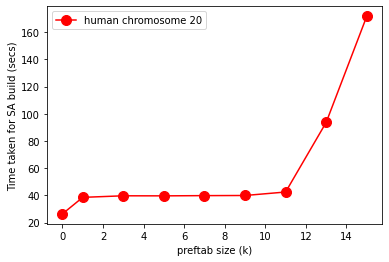

In [30]:
# plt.plot(profiling_data_small['preftab_k'], profiling_data_small['create_time'], markersize=10, marker='o', color='blue', label='ecoli')
plt.plot(profiling_data_large['preftab_k'], profiling_data_large['create_time'], markersize=10, marker='o', color='red', label='human chromosome 20')
plt.xlabel('preftab size (k)')
plt.ylabel('Time taken for SA build (secs)')
plt.legend()
# plt.xscale('log')
# plt.yscale('log')

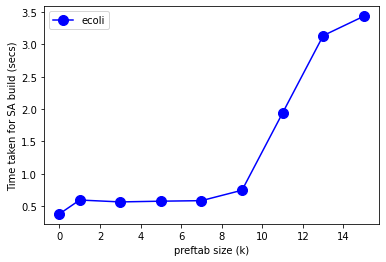

In [31]:
plt.plot(profiling_data_small['preftab_k'], profiling_data_small['create_time'], markersize=10, marker='o', color='blue', label='ecoli')
# plt.plot(profiling_data_large['preftab_k'], profiling_data_large['create_time'], markersize=10, marker='o', color='red', label='human chromosome 20')
plt.xlabel('preftab size (k)')
plt.ylabel('Time taken for SA build (secs)')
plt.legend()
# plt.xscale('log')
# plt.yscale('log')

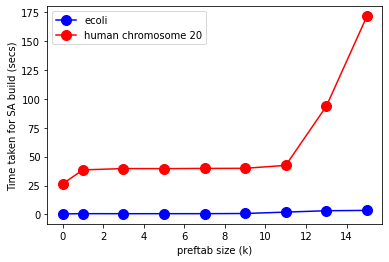

In [32]:
plt.plot(profiling_data_small['preftab_k'], profiling_data_small['create_time'], markersize=10, marker='o', color='blue', label='ecoli')
plt.plot(profiling_data_large['preftab_k'], profiling_data_large['create_time'], markersize=10, marker='o', color='red', label='human chromosome 20')
plt.xlabel('preftab size (k)')
plt.ylabel('Time taken for SA build (secs)')
plt.legend()
# plt.xscale('log')
# plt.yscale('log')

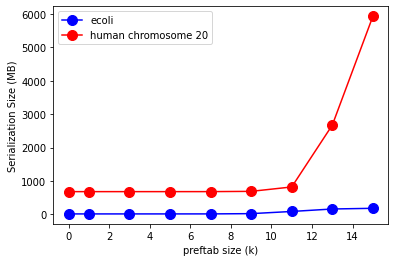

In [33]:
plt.plot(profiling_data_small['preftab_k'], profiling_data_small['serialized_size'], markersize=10, marker='o', color='blue', label='ecoli')
plt.plot(profiling_data_large['preftab_k'], profiling_data_large['serialized_size'], markersize=10, marker='o', color='red', label='human chromosome 20')
plt.xlabel('preftab size (k)')
plt.ylabel('Serialization Size (MB)')
plt.legend()
# plt.xscale('log')
# plt.yscale('log')

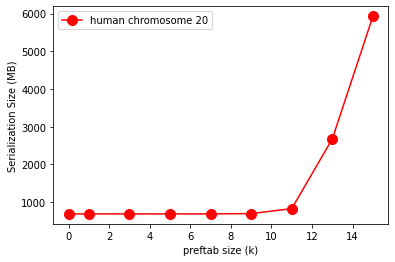

In [34]:
# plt.plot(profiling_data_small['preftab_k'], profiling_data_small['serialized_size'], markersize=10, marker='o', color='blue', label='ecoli')
plt.plot(profiling_data_large['preftab_k'], profiling_data_large['serialized_size'], markersize=10, marker='o', color='red', label='human chromosome 20')
plt.xlabel('preftab size (k)')
plt.ylabel('Serialization Size (MB)')
plt.legend()
# plt.xscale('log')
# plt.yscale('log')

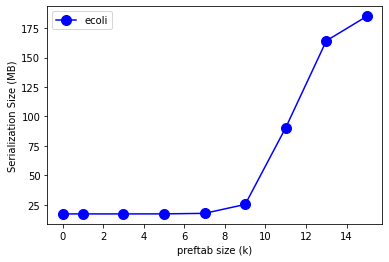

In [35]:
plt.plot(profiling_data_small['preftab_k'], profiling_data_small['serialized_size'], markersize=10, marker='o', color='blue', label='ecoli')
# plt.plot(profiling_data_large['preftab_k'], profiling_data_large['serialized_size'], markersize=10, marker='o', color='red', label='human chromosome 20')
plt.xlabel('preftab size (k)')
plt.ylabel('Serialization Size (MB)')
plt.legend()
# plt.xscale('log')
# plt.yscale('log')

In [36]:
query_data = pd.read_csv('query_profiling.csv')
query_data

,seq_size,query_size,preftab_k,mode,search_time
0,4639675,47,0,naive,0.016533
1,4639675,47,0,simpaccel,0.014244
2,4639675,37,0,naive,0.008874
3,4639675,37,0,simpaccel,0.013701
4,4639675,29,0,naive,0.008504
...,...,...,...,...,...
359995,159345973,58,15,simpaccel,0.000458
359996,159345973,59,15,naive,0.000631
359997,159345973,59,15,simpaccel,0.000400
359998,159345973,11,15,naive,0.000400


In [39]:
query_data_small = query_data[query_data['seq_size'] == 4639675 ]
query_data_large = query_data[query_data['seq_size'] == 159345973 ]

In [43]:
small_naive = query_data_small[(query_data_small['mode'] == 'naive') & (query_data_small['preftab_k'] == 0)]
small_accel = query_data_small[(query_data_small['mode'] == 'simpaccel') & (query_data_small['preftab_k'] == 0)]
large_naive = query_data_large[(query_data_large['mode'] == 'naive') & (query_data_large['preftab_k'] == 0)]
large_accel = query_data_large[(query_data_large['mode'] == 'simpaccel') & (query_data_large['preftab_k'] == 0)]

In [65]:
times = small_naive.groupby('query_size')['search_time'].mean().tolist()
sizes = sorted(small_naive['query_size'].unique().tolist())
times_l = large_naive.groupby('query_size')['search_time'].mean().tolist()
sizes_l = sorted(large_naive['query_size'].unique().tolist())

Text(0, 0.5, 'Time in ms')

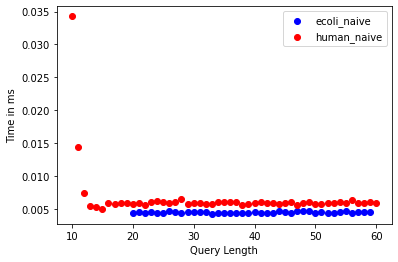

In [68]:
plt.scatter(sizes, times, marker='o', color='blue', label='ecoli_naive')
plt.scatter(sizes_l, times_l, marker='o', color='red', label='human_naive')
plt.legend()
plt.xlabel('Query Length')
plt.ylabel('Time in ms')

Text(0, 0.5, 'Time in ms')

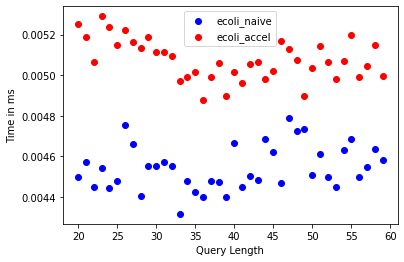

In [69]:
times = small_naive.groupby('query_size')['search_time'].mean().tolist()
sizes = sorted(small_naive['query_size'].unique().tolist())
times_a = small_accel.groupby('query_size')['search_time'].mean().tolist()
sizes_a = sorted(small_accel['query_size'].unique().tolist())
plt.scatter(sizes, times, marker='o', color='blue', label='ecoli_naive')
plt.scatter(sizes_a, times_a, marker='o', color='red', label='ecoli_accel')
plt.legend()
plt.xlabel('Query Length')
plt.ylabel('Time in ms')

Text(0, 0.5, 'Time in ms')

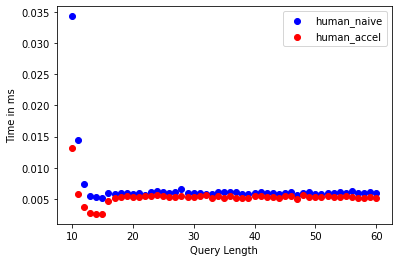

In [70]:
times = large_naive.groupby('query_size')['search_time'].mean().tolist()
sizes = sorted(large_naive['query_size'].unique().tolist())
times_a = large_accel.groupby('query_size')['search_time'].mean().tolist()
sizes_a = sorted(large_accel['query_size'].unique().tolist())
plt.scatter(sizes, times, marker='o', color='blue', label='human_naive')
plt.scatter(sizes_a, times_a, marker='o', color='red', label='human_accel')
plt.legend()
plt.xlabel('Query Length')
plt.ylabel('Time in ms')

In [72]:
small_naive = query_data_small[(query_data_small['mode'] == 'naive')& (query_data_small['query_size'] >= 20)]
small_accel = query_data_small[(query_data_small['mode'] == 'simpaccel') & (query_data_small['query_size'] >= 20)]
large_naive = query_data_large[(query_data_large['mode'] == 'naive') & (query_data_large['query_size'] >= 20)] 
large_accel = query_data_large[(query_data_large['mode'] == 'simpaccel') & (query_data_large['query_size'] >= 20)]

Text(0, 0.5, 'Time in ms')

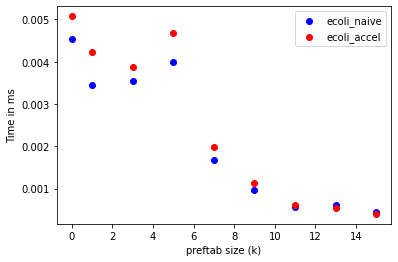

In [73]:
times = small_naive.groupby('preftab_k')['search_time'].mean().tolist()
sizes = sorted(small_naive['preftab_k'].unique().tolist())
times_a = small_accel.groupby('preftab_k')['search_time'].mean().tolist()
sizes_a = sorted(small_accel['preftab_k'].unique().tolist())
plt.scatter(sizes, times, marker='o', color='blue', label='ecoli_naive')
plt.scatter(sizes_a, times_a, marker='o', color='red', label='ecoli_accel')
plt.legend()
plt.xlabel('preftab size (k)')
plt.ylabel('Time in ms')

Text(0, 0.5, 'Time in ms')

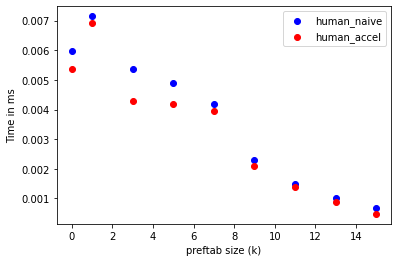

In [74]:
times = large_naive.groupby('preftab_k')['search_time'].mean().tolist()
sizes = sorted(large_naive['preftab_k'].unique().tolist())
times_a = large_accel.groupby('preftab_k')['search_time'].mean().tolist()
sizes_a = sorted(large_accel['preftab_k'].unique().tolist())
plt.scatter(sizes, times, marker='o', color='blue', label='human_naive')
plt.scatter(sizes_a, times_a, marker='o', color='red', label='human_accel')
plt.legend()
plt.xlabel('preftab size (k)')
plt.ylabel('Time in ms')